In [102]:
# "Why, when, and how variability in emotion expression makes people look authentic and leader-like"
# Analysis script for Study 1 
# Evan W. Carr, 05-01-2018 (Columbia Business School)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from plotnine import *
from rpy2.robjects import r, pandas2ri

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('amanic1_exptrun_final_clean_17_11_01.csv')
rawDemog = pd.read_csv('demographics_survey_survey_17_11_01.csv')
rawJobs = pd.read_csv('job_survey_survey_17_11_01.csv')

rawData.head(20)

,date,time,group,subject,build,blocknum,trialnum,blockcode,trialcode,pretrialpause,...,latency,stimulusnumber1,stimulusitem1,stimulusonset1,stimulusnumber2,stimulusitem2,stimulusonset2,stimulusnumber3,stimulusitem3,stimulusonset3
0,103117,12:52:10,806904944,340280316,5.0.10.0,1,1,expt_intro,expt_intro,0,...,249349,1,"Welcome to the study! During this session, ...",30,1,cbs_logo.jpg,30,1,"If you need to exit the study early, you can d...",30
1,103117,12:52:10,806904944,340280316,5.0.10.0,2,1,hv3_female_block,hv3_female_trial,0,...,500,85,WF-011_11.jpg,3,0,0,0,0,0,0
2,103117,12:52:10,806904944,340280316,5.0.10.0,2,2,hv3_female_block,hv3_female_trial,0,...,500,73,WF-011_-04.jpg,2,0,0,0,0,0,0
3,103117,12:52:10,806904944,340280316,5.0.10.0,2,3,hv3_female_block,hv3_female_trial,0,...,500,62,WF-011_-15.jpg,1,0,0,0,0,0,0
4,103117,12:52:10,806904944,340280316,5.0.10.0,2,4,hv3_female_block,hv3_female_trial,0,...,500,79,WF-011_05.jpg,1,0,0,0,0,0,0
5,103117,12:52:10,806904944,340280316,5.0.10.0,2,5,hv3_female_block,hv3_female_trial,0,...,500,65,WF-011_-12.jpg,1,0,0,0,0,0,0
6,103117,12:52:10,806904944,340280316,5.0.10.0,2,6,hv3_female_block,hv3_female_trial,0,...,500,76,WF-011_02.jpg,1,0,0,0,0,0,0
7,103117,12:52:10,806904944,340280316,5.0.10.0,2,7,hv3_female_block,hv3_female_trial,0,...,500,87,WF-011_13.jpg,1,0,0,0,0,0,0
8,103117,12:52:10,806904944,340280316,5.0.10.0,2,8,hv3_female_block,hv3_female_trial,0,...,500,64,WF-011_-13.jpg,1,0,0,0,0,0,0
9,103117,12:52:10,806904944,340280316,5.0.10.0,2,9,hv3_female_block,hv3_female_trial,0,...,500,83,WF-011_09.jpg,1,0,0,0,0,0,0


In [103]:
# All subjects should have 386 observations (rows) in the dataset ...
# Any that have more/less than 386 need to be removed before analysis:
rawObsCount = (rawData
               .groupby('subject', as_index=False)
               .size()
               .reset_index(name='counts')
               .sort_values(by='counts'))

rawObsCount.head(30)

,subject,counts
36,159159933,1
213,940965457,1
78,292839563,24
178,773929842,29
201,886406741,32
111,460234065,32
215,955204288,32
180,776094049,33
138,548694195,33
11,58519494,34


In [104]:
# Create list of subject ID's to exclude:
exclSbj = rawObsCount.query('counts != 386')
exclSbj = np.array(exclSbj['subject'])
exclSbj

array([159159933, 940965457, 292839563, 773929842, 886406741, 460234065,
       955204288, 776094049, 548694195,  58519494,  52981696, 614959507,
       529377873, 141467720, 900356126, 221796339, 340280316, 363540134,
       167059365,  65292312, 427039206, 594715388], dtype=int64)

In [105]:
# Filter to important columns, and exclude subjects that didn't finish the study:
cleanCols = ['subject', 'blocknum', 'trialnum', 'blockcode', 'trialcode', 'response', 'latency', 'stimulusitem1']
cleanData = rawData.loc[~rawData['subject'].isin(exclSbj), cleanCols]
cleanData.head()

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1
193,465293704,1,1,expt_intro,expt_intro,57.0,4171,"Welcome to the study! During this session, ..."
194,465293704,2,1,hv1_female_block,hv1_female_trial,0.0,500,WF-009_11.jpg
195,465293704,2,2,hv1_female_block,hv1_female_trial,0.0,500,WF-009_04.jpg
196,465293704,2,3,hv1_female_block,hv1_female_trial,0.0,500,WF-009_09.jpg
197,465293704,2,4,hv1_female_block,hv1_female_trial,0.0,500,WF-009_-06.jpg


In [106]:
# Quickly check subject times to complete the study (should usually be around 5-8 minutes):
completionTimes = (cleanData
                   .groupby('subject')
                   .agg({'latency': 'sum'})
                   .reset_index())

completionTimes['latency_mins'] = (completionTimes['latency'] / 1000) / 60

completionTimes.head(10)

,subject,latency,latency_mins
0,891765,442378,7.372967
1,6822400,670745,11.179083
2,7504972,692462,11.541033
3,12191860,310893,5.181550
4,13417493,354598,5.909967
5,22024596,499076,8.317933
6,33510929,320256,5.337600
7,40037666,346593,5.776550
8,49563899,326455,5.440917
9,54532176,286538,4.775633


In [107]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawDemog
                .groupby('subject')
                .agg({'age_response': np.mean, "gender_response": pd.Series.unique})
                .reset_index())

demogSummary = demogSummary[~demogSummary['subject'].isin(exclSbj)]

demogSummary['age_response'].mean()

36.87

In [108]:
demogSummary['age_response'].std()

9.995632211950523

In [109]:
demogSummary['gender_response'].value_counts()

Male      108
Female     92
Name: gender_response, dtype: int64

In [110]:
# Take a look at the data from the job survey.  Questions asked included ...
#    - Currently employed? (y/n) -- if so, how many years?
#    - Managerial status? (top, middle, lower, non)
#    - Job industry

cleanJobs = rawJobs[['subject', 
                     'currently_employed_response', 
                     'years_at_job_response',
                     'mgr_status_response',
                     'industry_type_response']]

cleanJobs.head(20)

,subject,currently_employed_response,years_at_job_response,mgr_status_response,industry_type_response
0,465293704,Yes,9,middle-management,Manufacturing
1,911299474,Yes,4,non-management,Finance
2,62276385,Yes,9,non-management,Corporate
3,649291712,Yes,12,non-management,High Tech
4,870963081,Yes,1,non-management,Transportation
5,208383413,Yes,3,non-management,High Tech
6,926899964,Yes,10,lower-management,Consumer Goods
7,70465461,Yes,5,top-management,Non-profit
8,188487282,Yes,8,non-management,Service
9,69429657,Yes,5,middle-management,Non-profit


In [111]:
# Are most of the subjects currently employed?  (Yes, ~97.5% have a job)
100 * (len(cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']) / cleanJobs.shape[0])

97.53694581280789

In [112]:
# Of the subjects that are currently employed, how long have they been at their jobs, by management type?
# (average range between 5-10 years across levels)
(cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']
 .groupby('mgr_status_response')
 .agg({'years_at_job_response': [np.mean, np.std]})
 .reset_index())

mgr_status_response years_at_job_response          
                                       mean       std
0    lower-management              7.265306  6.092261
1   middle-management              9.875000  7.069939
2      non-management              5.527473  4.924633
3      top-management              6.000000  5.477226

In [113]:
# What percentages of our subjects fall into which industries, and how many years have they been there?
# (Many subjects work in high-tech, service, finance, and/or education -- all > 10% of our subject pool, 
# and all industry types have average number of years > 4)
industryPerc = (100 * (cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes', 'industry_type_response']
                      .value_counts() \
                      / cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes', 'industry_type_response'].shape[0])
                .to_frame()).reset_index().rename(index=str, columns={'industry_type_response': 'percent_of_sbj'})

industryYrs = (cleanJobs.loc[cleanJobs['currently_employed_response']=='Yes']
               .groupby('industry_type_response')
               .agg({'years_at_job_response': np.mean})
               .reset_index()
               .rename(index=str, columns={'industry_type_response': 'index', 'years_at_job_response': 'mean_yrs'}))

industryPerc.merge(industryYrs, on='index', how='inner')

,index,percent_of_sbj,mean_yrs
0,High Tech,14.646465,5.310345
1,Service,12.626263,5.600000
2,Finance,11.616162,6.478261
3,Educational,11.616162,8.043478
4,Manufacturing,10.606061,9.571429
5,Consumer Goods,10.101010,6.600000
6,Medical,8.080808,4.812500
7,Non-profit,5.050505,8.700000
8,Construction,4.040404,8.000000
9,Arts,2.525253,6.800000


In [114]:
# Create column for emotion variability condition ('model_block'):
cleanData = (cleanData
             .join(cleanData['blockcode'].str.split('_', 1, expand=True)
                   .rename(columns={0:'model_block', 1:'junk'})))

cleanData = cleanData.drop(['junk'], axis=1)

cleanData.head()

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1,model_block
193,465293704,1,1,expt_intro,expt_intro,57.0,4171,"Welcome to the study! During this session, ...",expt
194,465293704,2,1,hv1_female_block,hv1_female_trial,0.0,500,WF-009_11.jpg,hv1
195,465293704,2,2,hv1_female_block,hv1_female_trial,0.0,500,WF-009_04.jpg,hv1
196,465293704,2,3,hv1_female_block,hv1_female_trial,0.0,500,WF-009_09.jpg,hv1
197,465293704,2,4,hv1_female_block,hv1_female_trial,0.0,500,WF-009_-06.jpg,hv1


In [115]:
# Map emotion variability condition ('model_block') to umbrella factor: 
varDict = {'expt': 'expt',
           'lv1': 'lv',
           'lv2': 'lv',
           'lv3': 'lv',
           'hv1': 'hv',
           'hv2': 'hv',
           'hv3': 'hv'}

cleanData['model_block'] = cleanData['model_block'].map(varDict)
cleanData.head()

,subject,blocknum,trialnum,blockcode,trialcode,response,latency,stimulusitem1,model_block
193,465293704,1,1,expt_intro,expt_intro,57.0,4171,"Welcome to the study! During this session, ...",expt
194,465293704,2,1,hv1_female_block,hv1_female_trial,0.0,500,WF-009_11.jpg,hv
195,465293704,2,2,hv1_female_block,hv1_female_trial,0.0,500,WF-009_04.jpg,hv
196,465293704,2,3,hv1_female_block,hv1_female_trial,0.0,500,WF-009_09.jpg,hv
197,465293704,2,4,hv1_female_block,hv1_female_trial,0.0,500,WF-009_-06.jpg,hv


In [116]:
# Access and log stimulus model ID codes for inclusion in mixed-effects models (shown later):
ratingsList = ['authenticity_slider', 'power_slider']
modelSummary = (cleanData
                .groupby(['subject', 'blocknum'])
                .agg({"stimulusitem1": pd.Series.unique})
                .reset_index())

modelSummary.head(10)

,subject,blocknum,stimulusitem1
0,891765,1,"Welcome to the study! During this session, ..."
1,891765,2,"[WM-003_04_crop.jpg, WM-003_-03_crop.jpg, WM-0..."
2,891765,3,"[WF-009_03.jpg, WF-009_05.jpg, WF-009_06.jpg, ..."
3,891765,4,"[WM-006_02_crop.jpg, WM-006_-10_crop.jpg, WM-0..."
4,891765,5,"[WF-011_15.jpg, WF-011_04.jpg, WF-011_11.jpg, ..."
5,891765,6,"[WM-029_04_crop.jpg, WM-029_-15_crop.jpg, WM-0..."
6,891765,7,"[WM-009_-04_crop.jpg, WM-009_04_crop.jpg, WM-0..."
7,891765,8,"[WF-027_-02.jpg, WF-027_-03.jpg, WF-027_03.jpg..."
8,891765,9,"[WF-015_-07.jpg, WF-015_-11.jpg, WF-015_06.jpg..."
9,891765,10,"[WM-033_-04_crop.jpg, WM-033_05_crop.jpg, WM-0..."


In [117]:
# 'modelSummary' dataframe shows all unique stimuli shown to each subject, by blocknum ...
# Not useful yet, but will be if we can split stimulus names apart:
modelList = []
for i in range(0, modelSummary.shape[0]):
    modelID = modelSummary.iloc[i]['stimulusitem1'][0].split('_', 1)[0]
    modelList.append(modelID)
    
modelSummary['model_id'] = modelList
modelSummary = modelSummary.drop('stimulusitem1', axis=1)

modelSummary.head(15)

,subject,blocknum,model_id
0,891765,1,W
1,891765,2,WM-003
2,891765,3,WF-009
3,891765,4,WM-006
4,891765,5,WF-011
5,891765,6,WM-029
6,891765,7,WM-009
7,891765,8,WF-027
8,891765,9,WF-015
9,891765,10,WM-033


In [118]:
# Subjects only saw real stimuli in blocknum's 2-13 ...
# Do an inner join with the main data to get only those blocks, then filter to only when subjects gave ratings:
cleanRatings = pd.merge(cleanData, modelSummary, on=('subject', 'blocknum'), how='inner')
cleanRatings = cleanRatings.loc[(cleanRatings['model_block'] != 'expt') & (cleanRatings['trialcode'].isin(ratingsList)), :]
cleanRatings = cleanRatings.drop(['blocknum', 'trialnum', 'blockcode', 'stimulusitem1'], axis=1)

cleanRatings.head(40)

,subject,trialcode,response,latency,model_block,model_id
31,465293704,authenticity_slider,51.0,19574,hv,WF-009
32,465293704,power_slider,51.0,10997,hv,WF-009
63,465293704,authenticity_slider,52.0,4728,hv,WF-016
64,465293704,power_slider,51.0,4360,hv,WF-016
95,465293704,power_slider,51.0,6166,lv,WF-011
96,465293704,authenticity_slider,51.0,4536,lv,WF-011
127,465293704,power_slider,51.0,5081,hv,WM-009
128,465293704,authenticity_slider,51.0,4158,hv,WM-009
159,465293704,authenticity_slider,51.0,43472,hv,WF-015
160,465293704,power_slider,51.0,3150,hv,WF-015


In [119]:
# Create individual datasets for each major DV:
authenticityData = cleanRatings.query("trialcode == 'authenticity_slider'")
powerData = cleanRatings.query("trialcode == 'power_slider'")

In [120]:
# Run mixed-effects models on each DV:
#    - fixed = variability (high vs. low)
#    - random = subject & model_id (will add model_id random-effects in R models later)

a_m1 = smf.mixedlm("response ~ model_block", data=authenticityData, groups=authenticityData['subject']).fit()
print(a_m1.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  response   
No. Observations:  2400     Method:              REML       
No. Groups:        200      Scale:               493.0465   
Min. group size:   12       Likelihood:          -10955.8423
Max. group size:   12       Converged:           Yes        
Mean group size:   12.0                                     
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         62.312    0.914 68.143 0.000 60.519 64.104
model_block[T.lv] -5.282    0.907 -5.826 0.000 -7.058 -3.505
groups RE         85.060    0.595                           



In [121]:
p_m1 = smf.mixedlm("response ~ model_block", data=powerData, groups=powerData['subject']).fit()
print(p_m1.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  response   
No. Observations:   2400     Method:              REML       
No. Groups:         200      Scale:               435.2489   
Min. group size:    12       Likelihood:          -10843.7344
Max. group size:    12       Converged:           Yes        
Mean group size:    12.0                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          55.793    0.996 56.014 0.000 53.840 57.745
model_block[T.lv]  -2.464    0.852 -2.893 0.004 -4.133 -0.795
groups RE         125.882    0.814                           



In [122]:
# Models suggest that high-variability leads to greater ratings of both authenticity and power ...

# Push objects to R to confirm and extend analyses
# (statsmodels package in python has trouble fitting certain random-effect structures):

pandas2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [123]:
# Send datasets with ratings to R: 
%R -i cleanRatings,authenticityData,powerData

In [124]:
%%R

# Use R to create mixed-effects models with both subject- and stimulus-level random effects:

library(lmerTest)

a_m2 <- lmer(response ~ model_block + (1|subject) + (1|model_id), data=authenticityData)
a_m2_anova <- anova(a_m2)
a_m2_lsmeans <- lsmeans(a_m2)
             
p_m2 <- lmer(response ~ model_block + (1|subject) + (1|model_id), data=powerData)
p_m2_anova <- anova(p_m2)
p_m2_lsmeans <- lsmeans(p_m2)

# Include rating type ('trialcode' = authenticity vs. power) as another factor
both_m1 <- lmer(response ~ model_block * trialcode + (1|subject) + (1|model_id), data=cleanRatings)
both_m1_anova <- anova(both_m1)
both_m1_lsmeans <- lsmeans(both_m1)

In [125]:
# Pull model results back to python:
%R -o a_m2_anova,a_m2_lsmeans,p_m2_anova,p_m2_lsmeans,both_m1_anova,both_m1_lsmeans

In [126]:
pandas2ri.ri2py(a_m2_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,17391.599876,17391.599876,1,2190.221094,36.646797,1.661272e-09


In [127]:
pandas2ri.ri2py(p_m2_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,3059.822476,3059.822476,1,2189.113849,7.627141,0.005798


In [133]:
pandas2ri.ri2py(both_m1_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
model_block,17565.474005,17565.474005,1,4589.409386,37.823520,8.402368e-10
trialcode,31339.630208,31339.630208,1,4585.983471,67.483242,2.220446e-16
model_block:trialcode,2381.491875,2381.491875,1,4585.983471,5.128037,2.358882e-02


In [129]:
# Variability main effect significant for both authenticity and power, but
# combined mixed-effects model ('both_m1') shows that the strength of the 
# variability effect depends on the rating (authenticity vs. power) ...

# Create dataset to plot the variability x rating type interaction:
plotData = pd.DataFrame({
    'rating_type': ['Authenticity', 'Authenticity', 'Power', 'Power'],
    'variability': ['High', 'Low', 'High', 'Low'],
    'slider_mean': [pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[4],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[5],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[6],
                    pandas2ri.ri2py(both_m1_lsmeans[0]).Estimate[7]],
    'slider_sem': [pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][4],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][5],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][6],
                   pandas2ri.ri2py(both_m1_lsmeans[0])['Standard Error'][7]]
})

# Adjust numbers to start at 45 (plotnine isn't great at scaling charts to non-zero y-axes):
plotData['slider_mean_45'] = plotData['slider_mean']-45
plotData

,rating_type,slider_mean,slider_sem,variability,slider_mean_45
0,Authenticity,62.2924,1.3764,High,17.2924
1,Authenticity,57.0493,1.3764,Low,12.0493
2,Power,55.7732,1.3764,High,10.7732
3,Power,53.3476,1.3764,Low,8.3476


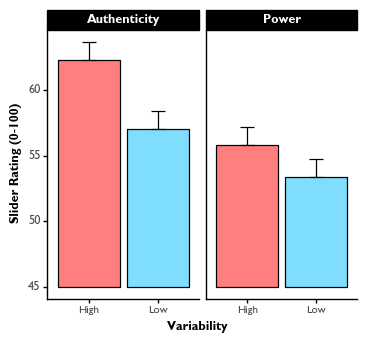

<ggplot: (127731480156)>

In [130]:
# Use plotnine package to plot using ggplot2 (R) style ...
# Manually recoding y-axis labels using 'slider_mean_45' variable (starting y-axis at zero doesn't look good):
(ggplot(plotData, aes(x='factor(variability)', y='slider_mean_45', fill='factor(variability)')) 
 + geom_errorbar(aes(ymax='slider_mean_45 + slider_sem', ymin='slider_mean_45'), position=position_dodge(width=0.9), width=0.2, color='black')
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=0.5, color='black')
 + scale_fill_manual(values=['red', 'deepskyblue'], guide=False)
 + facet_wrap('~ rating_type', nrow=1)
 + scale_y_continuous(labels=['45', '50', '55', '60'])
 + labs(x='Variability', y='Slider Rating (0-100)')
 + theme_classic()
 + theme(figure_size = (4, 3.5),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size = 8),
         axis_title_x = element_text(size = 9, weight = 'bold'),
         axis_text_y = element_text(size = 9),
         axis_title_y = element_text(size = 9, weight = 'bold'),
         axis_line_x = element_line(color = 'black'),
         axis_line_y = element_line(color = 'black'),
         strip_text_x = element_text(weight = 'bold', color = 'white', size = 9), 
         strip_background = element_rect(fill = 'black')))

In [131]:
# Main interaction plot shows that high-variability leads to especially high ratings of authenticity ...

# Create new dataframe for figure showing high vs. low variability stimulus distributions:
expDesignData = pd.DataFrame({
    'feature': np.repeat(np.linspace(-75, 75, num=31), [2]*31),
    'emotion': ['Angry']*30 + ['Neutral']*2 + ['Happy']*30,
    'variability': ['High Variability', 'Low Variability']*31,
    'count': np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,3,1,3,1,3,1,3,1,3,0,0,1,3,1,3,1,3,1,3,1,3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
})

expDesignData

,count,emotion,feature,variability
0,1,Angry,-75.0,High Variability
1,0,Angry,-75.0,Low Variability
2,1,Angry,-70.0,High Variability
3,0,Angry,-70.0,Low Variability
4,1,Angry,-65.0,High Variability
5,0,Angry,-65.0,Low Variability
6,1,Angry,-60.0,High Variability
7,0,Angry,-60.0,Low Variability
8,1,Angry,-55.0,High Variability
9,0,Angry,-55.0,Low Variability


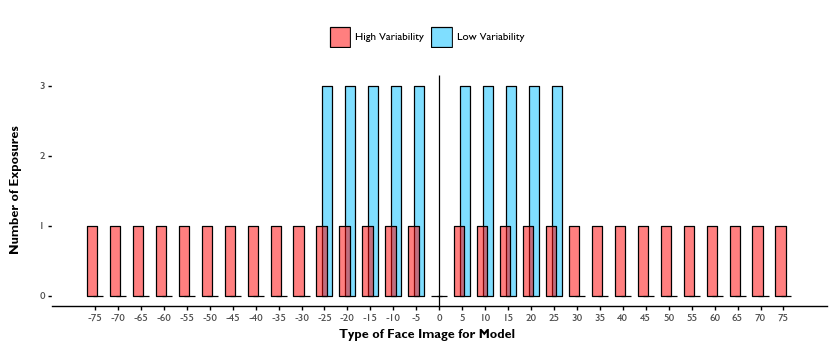

<ggplot: (-9223371909143160583)>

In [132]:
# Generate figure for high vs. low variability stimulus presentation distributions:
(ggplot(expDesignData, aes(x='feature', y='count', fill='variability'))
 + geom_bar(stat='identity', position=position_dodge(width=2.5), alpha=0.5, color='black')
 + scale_fill_manual(values = ['red', 'deepskyblue'])
 + geom_vline(xintercept=0, color='black')
 + scale_x_continuous(breaks=np.linspace(-75, 75, num=31), labels=np.linspace(-75, 75, num=31).astype(int))
 + scale_y_continuous(limits=[0, 3])
 + theme_classic()
 + labs(x='Type of Face Image for Model', y='Number of Exposures\n')
 + theme(figure_size = (10,3),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size=8),
         axis_title_x = element_text(size=9, weight='bold'),
         axis_text_y = element_text(size=8),
         axis_title_y = element_text(size=9, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='white'),
         legend_title = element_blank(),
         legend_text = element_text(size=8),
         legend_position = 'top'))